In [65]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣Data Loading & Initial Exploration
Load the CSV file and display the first 10 rows. Then
check the data types of all columns.

Convert the 'Date' column to datetime format and set it
as the index.

Display basic statistics (mean, std, min, max) for all
numeric columns and check for missing values

In [66]:
df = pd.read_csv('WMT.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2011-11-16  57.099998  57.419998  56.639999  56.680000  44.899456  11780800
1  2011-11-17  56.540001  57.189999  56.259998  56.730000  44.939064  10223800
2  2011-11-18  57.029999  57.360001  56.610001  57.230000  45.335129   8982300
3  2011-11-21  56.930000  57.290001  56.380001  56.660000  44.883606   9932200
4  2011-11-22  56.560001  57.130001  56.500000  56.849998  45.034107   7497300


In [67]:
df['Date'] = pd.to_datetime(df['Date'])

In [68]:
multi_tier = df.agg({
    
"Open" : ['min', 'max', 'median', 'mean'],
"High" : ['min', 'max', 'median', 'mean'],
"Low" : ['min', 'max', 'median', 'mean'],
"Close" : ['min', 'max', 'median', 'mean'],
"Adj Close": ['min', 'max', 'median', 'mean'],
"Volume": ['min', 'max', 'median', 'mean']
})

print(multi_tier)

              Open        High         Low       Close   Adj Close  \
min      56.389999   57.000000   56.259998   56.419998   44.867764   
max     153.600006  153.660004  151.660004  152.789993  151.449997   
median   78.580002   79.000000   78.055001   78.620003   68.370143   
mean     90.252091   90.943776   89.619245   90.281677   82.778431   

              Volume  
min     2.094900e+06  
max     8.089810e+07  
median  7.123900e+06  
mean    8.267159e+06  


In [69]:
missing = df.isnull().sum()
print(missing)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 2️⃣Filtering Data
Filter and display all days where the closing price was greater than $150.

Find all trading days where the volume exceeded 10 million shares AND the daily price change (Close -
Open) was positive.

Filter data for a specific date range (e.g., all data from 2023) and count how many trading days are in that
period

In [70]:
df["Day"] = df["Date"].dt.day

filtered_df = df.loc[df['Close'] > 150, ['Date', 'Day', 'Close']]
print(filtered_df)


           Date  Day       Close
2263 2020-11-13   13  150.539993
2264 2020-11-16   16  152.440002
2267 2020-11-19   19  152.119995
2268 2020-11-20   20  150.240005
2269 2020-11-23   23  150.929993
2270 2020-11-24   24  151.360001
2271 2020-11-25   25  151.830002
2272 2020-11-27   27  151.600006
2273 2020-11-30   30  152.789993
2274 2020-12-01    1  152.639999
2275 2020-12-02    2  150.520004
2448 2021-08-11   11  150.009995
2451 2021-08-16   16  150.750000
2452 2021-08-17   17  150.699997
2454 2021-08-19   19  150.110001
2455 2021-08-20   20  151.449997
2456 2021-08-23   23  150.449997
2500 2021-10-25   25  150.059998
2507 2021-11-03    3  150.179993
2508 2021-11-04    4  151.279999
2509 2021-11-05    5  150.229996


In [71]:
df[((df['Close'] > 150) & (df['Volume'] > 10_000_000))]

,Date,Open,High,Low,Close,Adj Close,Volume,Day
2264,2020-11-16,150.529999,153.399994,149.279999,152.440002,150.109238,11520100,16
2273,2020-11-30,151.600006,152.949997,150.100006,152.789993,150.453888,10898500,30
2448,2021-08-11,149.509995,151.580002,149.160004,150.009995,149.459991,13818600,11
2451,2021-08-16,149.679993,151.729996,149.039993,150.750000,150.750000,15930500,16
2452,2021-08-17,150.399994,152.500000,149.100006,150.699997,150.699997,16983400,17


In [72]:
df[((df['Open'] > 150) & (df['Volume'] > 10_000_000))][['Date', 'Day', 'Close']]

,Date,Day,Close
2212,2020-09-02,2,147.679993
2264,2020-11-16,16,152.440002
2265,2020-11-17,17,149.369995
2273,2020-11-30,30,152.789993
2452,2021-08-17,17,150.699997


In [73]:
data_2023 = df[
    (df['Date'] >= '2023-01-01') &
    (df['Date'] <= '2023-12-31')
]
print(data_2023)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Day]
Index: []


# 3️⃣Sorting Operations

Sort the data by 'Volume' in descending order and display the top 5 days with highest trading volume.

Find the top 10 days with the largest daily price range(High - Low).

In [74]:
top_5_volume = df.sort_values(by="Volume", ascending=False).head(5)
print(top_5_volume)

           Date       Open       High        Low      Close  Adj Close  \
982  2015-10-14  66.610001  67.949997  60.020000  60.029999  52.485310   
1403 2017-06-16  73.949997  75.500000  73.290001  75.239998  69.223030   
1573 2018-02-20  96.989998  97.940002  94.099998  94.110001  87.587776   
1574 2018-02-21  95.110001  95.339996  91.239998  91.519997  85.177277   
983  2015-10-15  59.700001  60.470001  58.610001  59.330002  51.873283   

        Volume  Day  
982   80898100   14  
1403  56233000   16  
1573  52088500   20  
1574  49503700   21  
983   46253500   15  


In [75]:
df['Price_Range'] = df['High'] - df['Low']
top_10_price = df.sort_values('Price_Range', ascending=False).head(10)
print(top_10_price)

           Date        Open        High         Low       Close   Adj Close  \
2095 2020-03-18  115.000000  128.080002  114.500000  122.580002  119.157875   
2097 2020-03-20  119.500000  122.790001  111.889999  113.970001  111.278450   
2092 2020-03-13  108.239998  114.589996  103.879997  114.099998  110.914604   
2211 2020-09-01  141.199997  149.589996  140.050003  147.589996  145.333389   
2096 2020-03-19  124.459999  127.000000  117.629997  119.449997  116.629036   
2171 2020-07-07  118.449997  127.550003  118.220001  126.949997  124.497154   
2093 2020-03-16  105.199997  111.330002  102.000000  106.760002  103.779518   
2083 2020-03-02  107.599998  116.400002  107.290001  115.879997  112.644913   
2094 2020-03-17  112.769997  119.269997  110.459999  119.260002  115.930557   
2091 2020-03-12  106.019997  111.489998  102.980003  104.050003  101.145172   

        Volume  Day  Price_Range  
2095  25785300   18    13.580002  
2097  18474500   20    10.900002  
2092  14320700   13    10

# 4️⃣Aggregation & Statistics

Calculate the monthly average closing price. Group by year-month and compute the mean of 'Close'

Calculate the total trading volume per year. 

For each quarter, calculate: average closing price, maximum high, minimum low, and total volume.

In [76]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2011  11        57.200000
      12        58.716190
2012  1         60.235500
      2         60.898000
      3         60.433637
                  ...    
2021  7        141.164763
      8        147.843182
      9        144.440954
      10       142.635713
      11       149.260907
Name: Close, Length: 121, dtype: float64

In [77]:
df.groupby(["Year", "Month"]).agg(
mean_Close =('Close', 'mean')     
)

mean_Close
Year Month            
2011 11      57.200000
     12      58.716190
2012 1       60.235500
     2       60.898000
     3       60.433637
...                ...
2021 7      141.164763
     8      147.843182
     9      144.440954
     10     142.635713
     11     149.260907

[121 rows x 1 columns]

In [78]:
df.groupby(df["Date"].dt.year).agg(
    
the_total_trading_volume=('Volume', 'sum')
)

,the_total_trading_volume
Date,
2011,289493000
2012,2309753800
2013,1751777000
2014,1641934300
2015,2278746700
2016,2361807500
2017,2234798900
2018,2376053100
2019,1522557600


# 6️⃣Data Visualization (Matplotlib & Seaborn)

Create a line plot showing the closing price over time using Matplotlib. Add title, labels, and a grid.

Create a candlestick-style visualization showing Open,High, Low, and Close prices for the last 30 trading days using Matplotlib.

Create a histogram of daily returns using Seaborn,showing the distribution. Add a KDE (kernel density estimate) overlay.



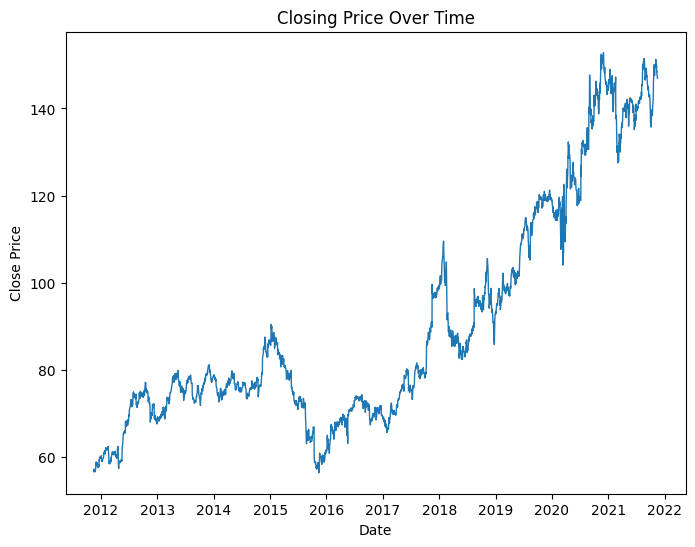

In [79]:
plt.figure(figsize=(8, 6))

plt.plot(df['Date'], df['Close'], linewidth=1)
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.show()


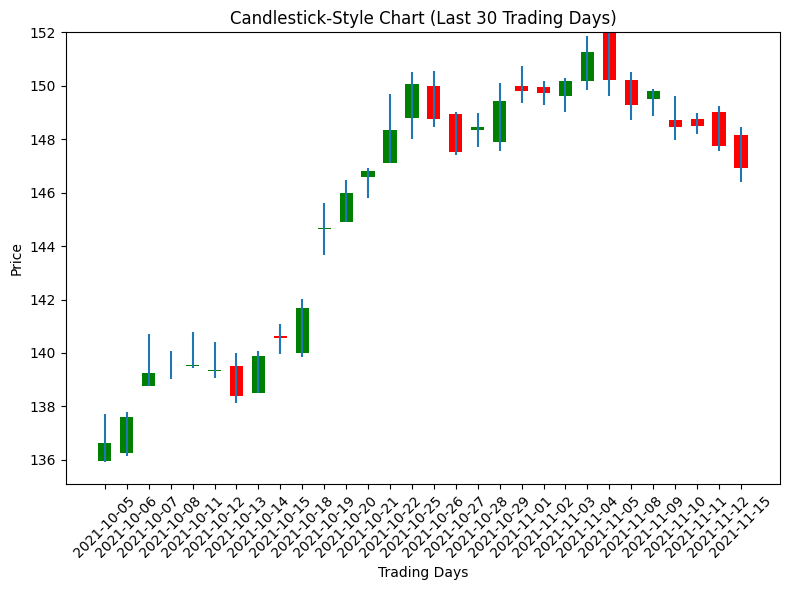

In [80]:
# take the last 30 trading days
last_30 = df.tail(30)

plt.figure(figsize=(8, 6))

for i in range(len(last_30)):
    open_price = last_30["Open"].iloc[i]
    close_price = last_30["Close"].iloc[i]
    high_price = last_30["High"].iloc[i]
    low_price = last_30["Low"].iloc[i]

    # choose color
    color = "green" if close_price >= open_price else "red"

    # draw the wick (high–low)
    plt.vlines(i, low_price, high_price)

    # draw the body (open–close)
    plt.bar(
        i,
        close_price - open_price,
        bottom=open_price,
        color=color,
        width=0.6
    )

plt.title("Candlestick-Style Chart (Last 30 Trading Days)")
plt.xlabel("Trading Days")
plt.ylabel("Price")
plt.xticks(range(len(last_30)), last_30["Date"].dt.strftime("%Y-%m-%d"), rotation=45)

plt.tight_layout()
plt.show()


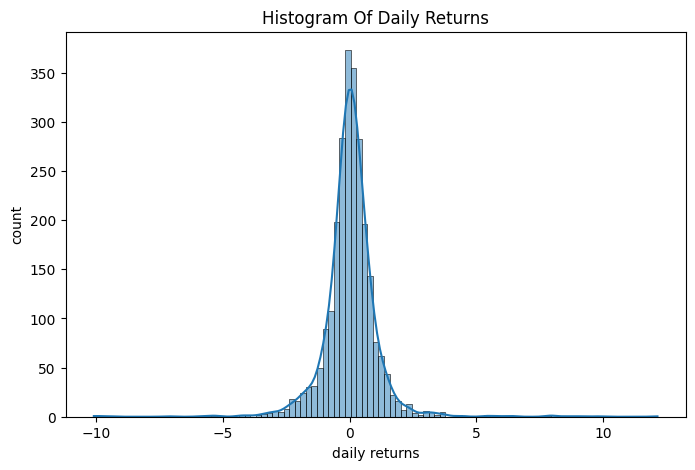

In [81]:
df['daily returns'] = df["Adj Close"].diff()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='daily returns', kde=True)
plt.title("Histogram Of Daily Returns")
plt.xlabel('daily returns')
plt.ylabel('count')

plt.show()

Create a heatmap showing the correlation between Open, High, Low, Close, and Volume using Seaborn.

Create a subplot figure with 3 plots: (1) Closing price with 30-day moving average, (2) Daily volume as a bar chart, (3) Daily returns.

Create a box plot using Seaborn showing the distribution of closing prices grouped by year.

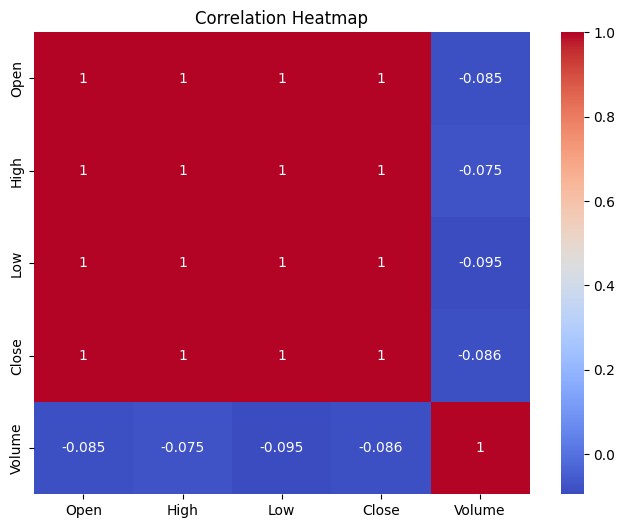

In [82]:
plt.figure(figsize=(8,6))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.show()

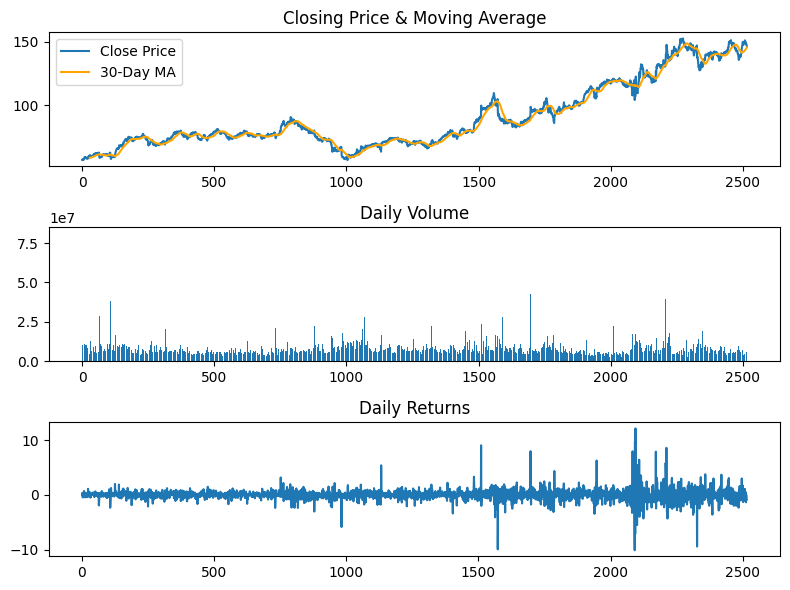

In [83]:
# 1) Closing price with moving average
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(df["Close"], label="Close Price")
df["MA_30"] = df["Close"].rolling(window=30).mean()
plt.plot(df["MA_30"], label="30-Day MA", color="orange")
plt.title("Closing Price & Moving Average")
plt.legend()

# 2) Daily volume
plt.subplot(3, 1, 2)
plt.bar(df.index, df["Volume"])
plt.title("Daily Volume")

# 3) Daily returns
plt.subplot(3, 1, 3)
plt.plot(df["daily returns"])
plt.title("Daily Returns")

plt.tight_layout()
plt.show()

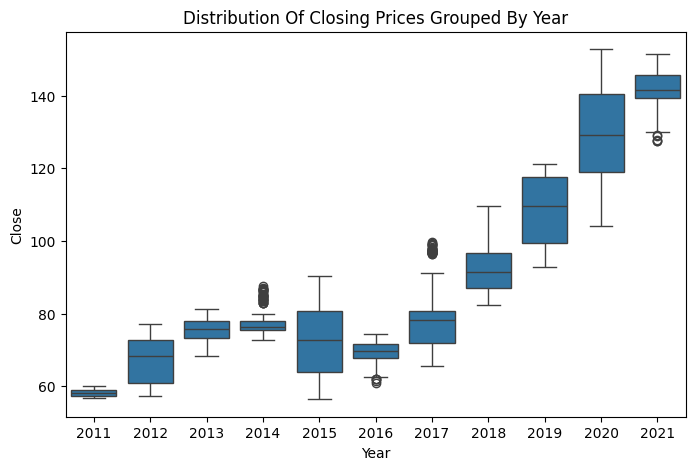

In [85]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Year', y='Close')
plt.title("Distribution Of Closing Prices Grouped By Year")
plt.xlabel('Year')
plt.ylabel('Close')

plt.show()

Create a pair plot using Seaborn for Open, High, Low, Close columns. Color code by whether it was a positive day (Close > Open).

Create a rolling volatility chart: Plot the 30-day rolling standard deviation of daily returns using Matplotlib

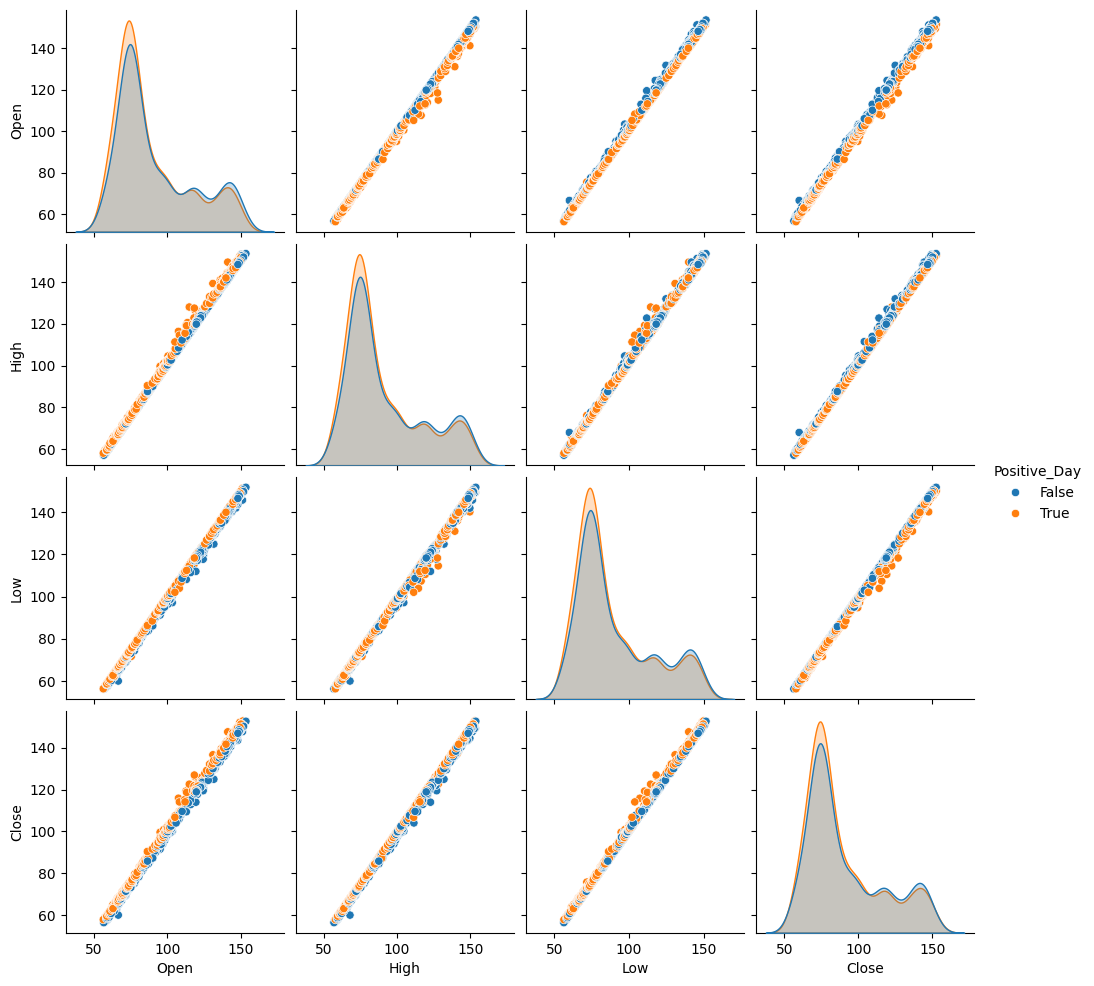

In [88]:
df['Positive_Day'] = df['Close'] > df['Open']
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Positive_Day']], hue='Positive_Day')
plt.show()

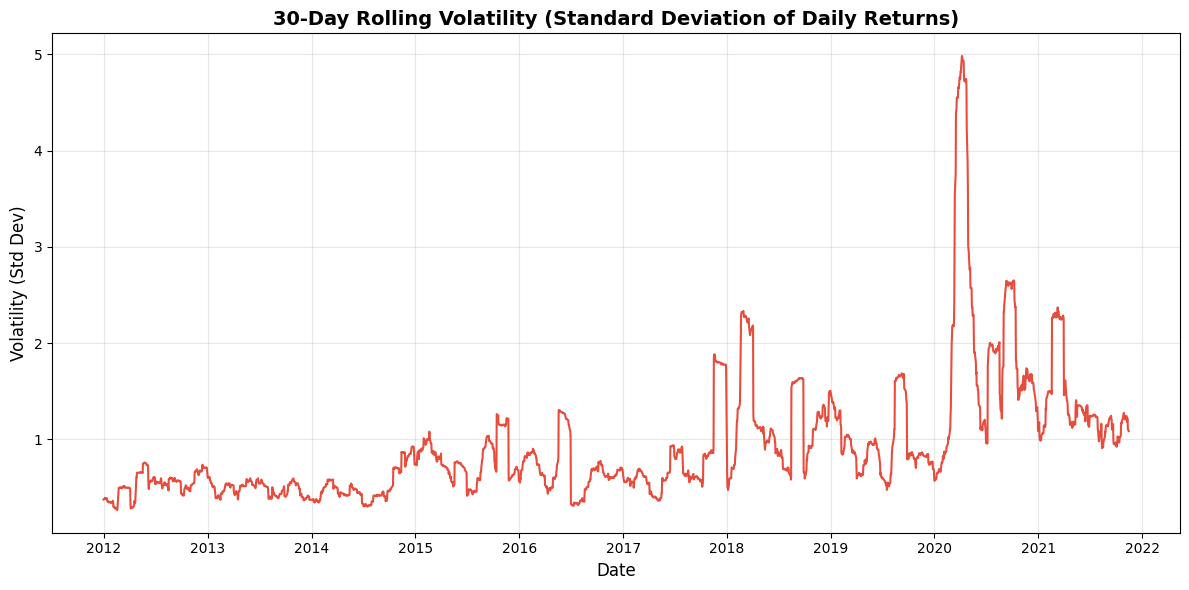

In [89]:
# Calculate 30-day rolling standard deviation of daily returns
df['rolling_volatility_30'] = df['daily returns'].rolling(window=30).std()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['rolling_volatility_30'], color='#e74c3c', linewidth=1.5)
plt.title('30-Day Rolling Volatility (Standard Deviation of Daily Returns)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Std Dev)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()